# Open the data set from .csv file

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import os
os.chdir("C:/Users/Giorgio/Desktop/Buildings python project/Data-driven simulation_Asnaashari - Casalicchio - Moretti")

In [5]:
DataFolderPath = "C:/Users/Giorgio/Desktop/Buildings python project/Data-driven simulation_Asnaashari - Casalicchio - Moretti/data sets"
FileName = "building5retail.csv"
FilePath = DataFolderPath + "/" + FileName

DF_start = pd.read_csv(FilePath, sep = ",", index_col = 0)

The file provides data about the power consumption (in kW) of a retail building located in Hialeah, Florida (USA) and the outdoor temperature (in °F) of the location every 15 minutes for the whole year 2010.

Converting the index into date-time object.

In [6]:
PreviousIndex = DF_start.index
ParsedIndex = pd.to_datetime(PreviousIndex)   
DF_start.index = ParsedIndex

Converting the temperature from °F to °C.

In [7]:
DF_start["OAT (degC)"] = (DF_start["OAT (F)"] - 32)/1.8
DF_consumption = DF_start.drop(["OAT (F)"], axis = 1)

DF_consumption.head(5)

,Power (kW),OAT (degC)
Timestamp,,
2010-01-01 01:15:00,162.6,19.444444
2010-01-01 01:30:00,156.5,19.444444
2010-01-01 01:45:00,157.2,19.444444
2010-01-01 02:00:00,151.0,19.444444
2010-01-01 02:15:00,160.5,17.222222


# Visualizing the data

Plotting the data during a week to see the possible correlation between consumption and outdoor temperature.

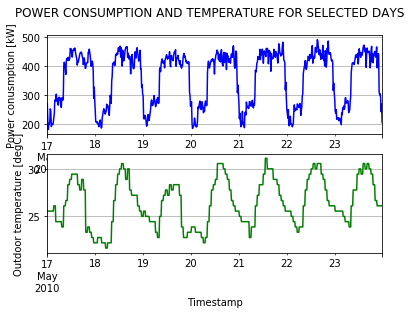

In [8]:
DF_chosenDates = DF_consumption["2010-05-17":"2010-05-23"] 
plt.subplot(211)
DF_chosenDates["Power (kW)"].plot(color = "b", grid = True)
plt.xlabel('')
plt.ylabel("Power conusmption [kW]")
plt.subplot(212)
DF_chosenDates["OAT (degC)"].plot(color = "g", grid = True)
plt.ylabel("Outdoor temperature [degC]")
plt.suptitle("POWER CONSUMPTION AND TEMPERATURE FOR SELECTED DAYS")
plt.show()

# Building the final data frame for machine learning predictions

We use as features the consumption of the previus 24 hours, the temperature of the previous 6 hours and information about hour, day, month, weekend/workday, day/night.

In [9]:
import useful_functions as uf

In [10]:
DF_consumption = uf.lag_column15(DF_consumption, "Power (kW)", 4*24)
DF_consumption = uf.lag_column15(DF_consumption, "OAT (degC)", 4*6)

DF_final = DF_consumption.dropna()

DF_final["hour"] = DF_final.index.hour
DF_final["day"] = DF_final.index.dayofweek   
DF_final["month"] = DF_final.index.month
DF_final['weekend'] = [uf.weekendDetector(thisDay) for thisDay in DF_final.index.dayofweek]
DF_final['day_night'] = [uf.dayDetector(thisHour) for thisHour in DF_final.index.hour]

DF_final.head(5)

C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Giorgio\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Power (kW),OAT (degC),Power (kW)-60min,Power (kW)-75min,Power (kW)-90min,Power (kW)-105min,Power (kW)-120min,Power (kW)-135min,Power (kW)-150min,Power (kW)-165min,...,OAT (degC)-300min,OAT (degC)-315min,OAT (degC)-330min,OAT (degC)-345min,OAT (degC)-360min,hour,day,month,weekend,day_night
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-02 01:15:00,127.1,11.666667,137.8,149.8,168.0,204.7,209.4,329.3,341.8,339.4,...,17.777778,17.777778,17.777778,17.777778,17.777778,1,5,1,1,0
2010-01-02 01:30:00,127.5,11.666667,141.0,137.8,149.8,168.0,204.7,209.4,329.3,341.8,...,17.777778,17.777778,17.777778,17.777778,17.777778,1,5,1,1,0
2010-01-02 01:45:00,128.3,11.666667,125.5,141.0,137.8,149.8,168.0,204.7,209.4,329.3,...,17.777778,17.777778,17.777778,17.777778,17.777778,1,5,1,1,0
2010-01-02 02:00:00,128.5,11.666667,132.3,125.5,141.0,137.8,149.8,168.0,204.7,209.4,...,17.777778,17.777778,17.777778,17.777778,17.777778,2,5,1,1,0
2010-01-02 02:15:00,123.7,11.111111,127.1,132.3,125.5,141.0,137.8,149.8,168.0,204.7,...,15.555556,17.777778,17.777778,17.777778,17.777778,2,5,1,1,0


# Machine learning

Setting target and features.

In [11]:
DF_target = DF_final[["Power (kW)"]]
DF_features = DF_final.drop("Power (kW)", axis = 1) 

Linear regression model - random choice of train and test data (80% train, 20% test).

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF_features, DF_target, test_size = 0.2, random_state = 41234)

In [13]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
LinearPredictions_complete = linear_reg.predict(DF_features)

LinearPredictions_complete_DF = pd.DataFrame(LinearPredictions_complete, index = DF_final.index, columns = ["Power predicted (kW)"])
LinearPredictions_final = DF_target.join(LinearPredictions_complete_DF)

Statistics.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_R2_score = r2_score(DF_target, LinearPredictions_final["Power predicted (kW)"])
linear_mean_absolute_error = mean_absolute_error(DF_target,LinearPredictions_final["Power predicted (kW)"])
linear_mean_squared_error = mean_squared_error(DF_target,LinearPredictions_final["Power predicted (kW)"])
linear_coeff_variation = np.sqrt(linear_mean_squared_error)/DF_target["Power (kW)"].mean()

print "R2 = " + str(linear_R2_score)
print "MAE = " + str(linear_mean_absolute_error)
print "MSE = " + str(linear_mean_squared_error)
print "CV = " + str(linear_coeff_variation)

R2 = 0.922973249508
MAE = 19.1996355258
MSE = 695.236033215
CV = 0.0787726915683


Linear regression model with cross-validation.

In [15]:
from sklearn.model_selection import cross_val_predict
CV_LinearPredictions = cross_val_predict(linear_reg, DF_features, DF_target, cv = 10)
CV_LinearPredictions_DF = pd.DataFrame(CV_LinearPredictions, index = DF_target.index, columns=["Power predicted CV (kW)"])
final_CV_LinearPredictions_DF = DF_target.join(CV_LinearPredictions_DF)

Statistics.

In [16]:
CV_R2_score = r2_score(final_CV_LinearPredictions_DF["Power (kW)"],final_CV_LinearPredictions_DF["Power predicted CV (kW)"])
CV_mean_absolute_error = mean_absolute_error(final_CV_LinearPredictions_DF["Power (kW)"], final_CV_LinearPredictions_DF["Power predicted CV (kW)"])
CV_mean_squared_error = mean_squared_error(final_CV_LinearPredictions_DF["Power (kW)"], final_CV_LinearPredictions_DF["Power predicted CV (kW)"])
CV_coeff_variation = np.sqrt(CV_mean_squared_error)/final_CV_LinearPredictions_DF["Power (kW)"].mean()

print "R2 = " + str(CV_R2_score)
print "MAE = " + str(CV_mean_absolute_error)
print "MSE = " + str(CV_mean_squared_error)
print "CV = " + str(CV_coeff_variation)

R2 = 0.919056470363
MAE = 19.5908040868
MSE = 730.588504637
CV = 0.0807506386561


Comparison between the predictions made with and without cross-validation.

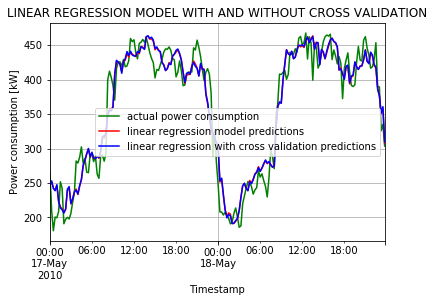

In [17]:
compare = LinearPredictions_final.join(CV_LinearPredictions_DF)

compare['2010-05-017':'2010-05-18'].plot(color = ("g","r","b"))
plt.title("LINEAR REGRESSION MODEL WITH AND WITHOUT CROSS VALIDATION")
plt.ylabel("Power consumption [kW]")
plt.grid()
plt.legend(('actual power consumption', 'linear regression model predictions',  'linear regression with cross validation predictions'))
plt.show()

# Conclusions

The correlation between temperature and power consumption of a retail building is well approximated by a linear model. 
The R2 score is, in fact, 0.92.
Moreover the behaviour of a retail building in terms of consumption is quite regular during the year, so it is easier to predict than a normal family house, in which the consumption is much more influenced by the occupancy.